<a href="https://colab.research.google.com/github/AdeepKrishnaKeelar/HTML-/blob/master/CNN_Image_Classification_Dog_Cat_Identification_Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from google.colab import drive
import matplotlib.pyplot as plt
import random

In [ ]:
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
x_train = np.loadtxt('/content/drive/MyDrive/Data/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Data/labels.csv', delimiter=',')

x_test = np.loadtxt('/content/drive/MyDrive/Data/input_test.csv',delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/Data/labels_test.csv',delimiter=',')

In [ ]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
print("Shape of X_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


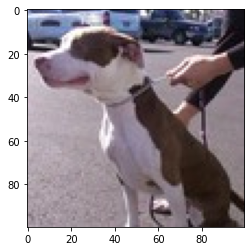

In [ ]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [ ]:
model = Sequential([
                    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
                    MaxPooling2D((2,2)),
                    Conv2D(32,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 21s 611ms/step - loss: 0.7397 - accuracy: 0.4940
Epoch 2/5
32/32 [==============================] - 20s 613ms/step - loss: 0.6807 - accuracy: 0.5810
Epoch 3/5
32/32 [==============================] - 20s 611ms/step - loss: 0.6331 - accuracy: 0.6405
Epoch 4/5
32/32 [==============================] - 24s 742ms/step - loss: 0.5963 - accuracy: 0.6950
Epoch 5/5
32/32 [==============================] - 20s 619ms/step - loss: 0.5526 - accuracy: 0.7390


In [ ]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 83ms/step - loss: 0.6307 - accuracy: 0.6500


[0.6306793093681335, 0.6499999761581421]

In [ ]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred=model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5
if(y_pred==0):
  pred = 'dog'
else:
  pred = 'cat'
print("Our model says it is a :",pred)

NameError: ignored